In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sen

In [2]:
base,ed,ep,dvae = torch.load('full_user_data_with_T.pt')
# ed, ep = torch.load('data_2_3.pt')

In [3]:
base = torch.log(base)
ed = torch.log(ed)
ep = torch.log(ep)
dvae = torch.log(dvae)

In [4]:
import pandas as pd

In [5]:
ed_df = pd.DataFrame(ed.transpose(0, 1).numpy())

In [6]:
ep_df = pd.DataFrame(ep.transpose(0, 1).numpy())

In [7]:
base_df = pd.DataFrame(base.transpose(0, 1).numpy())

In [8]:
dvae_df = pd.DataFrame(dvae.transpose(0, 1).numpy())

In [9]:
def get_reformat(df: pd.DataFrame):
    ret = None
    for i in df.index:
        A = pd.DataFrame(df.iloc[i, :]).rename_axis('user')
        A.columns = ["score"]
        A.insert(0, 'item', i)
        A = A.reset_index()

        if ret is None:
            ret = A
        else:
            ret = pd.concat([ret, A], ignore_index=True)

    return ret

In [12]:
t_base = get_reformat(base_df.iloc[:100, :500])
t_ed = get_reformat(ed_df.iloc[:100, :500])
t_ep = get_reformat(ep_df.iloc[:100, :500])
t_dvae = get_reformat(dvae_df.iloc[:100, :500])

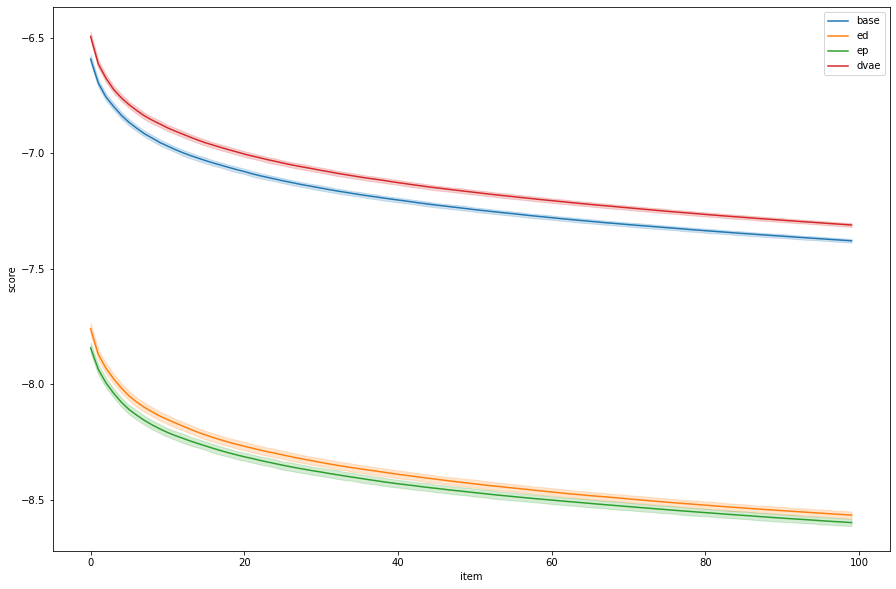

In [13]:
plt.figure(figsize=(15, 10))

sen.lineplot(data=t_base, x='item', y='score', ci=90)
sen.lineplot(data=t_ed, x='item', y='score', ci=90)
sen.lineplot(data=t_ep, x='item', y='score', ci=90)
sen.lineplot(data=t_dvae, x='item', y='score', ci=90)

plt.legend(labels=["base","ed", "ep", "dvae"])